In [1]:
import nbsetup
from models.sparc.result import Result
from models.sparc.mcmc import mcmc
from models.sparc.analysis import Analysis

In [2]:
from models.load import load_sparc
simulations = load_sparc(namespace='sparcapprox')

In [3]:
default = Result()

In [4]:
DATASET = 'Quality'

In [5]:
analysis = {
    'yes': Analysis('MCMC', mcmc(default.datasets()[DATASET], train_tau=True)),
    'no': Analysis('MCMC', mcmc(default.datasets()[DATASET], train_tau=False))
}

In [6]:
results = dict([(mode, aa.Result(fast=True)) for mode, aa in analysis.items()])

In [7]:
# epsilon outside
for mode, res in results.items():
    print(mode)
    display(res.statistics(weight=True).query('dataset=="%s"' % DATASET))

yes


,dataset,observation,r2,RMSE,MAE,MLSE,Res(Log y),Res(Log mhi_R),Res(Log nulled)
4,Quality,little g,0.458142,16532.38057,2752.830647,0.241347,-0.062567,-0.007236,0.024036
5,Quality,velocity,0.894334,28.46901,19.906607,0.056990,-0.062567,-0.007236,0.024036


no


,dataset,observation,r2,RMSE,MAE,MLSE,Res(Log y),Res(Log mhi_R),Res(Log nulled)
4,Quality,little g,0.571693,14698.411063,2326.007769,0.312647,-0.149883,0.076382,-0.010497
5,Quality,velocity,0.887147,29.421339,21.784515,0.074044,-0.149883,0.076382,-0.010497


yes
no


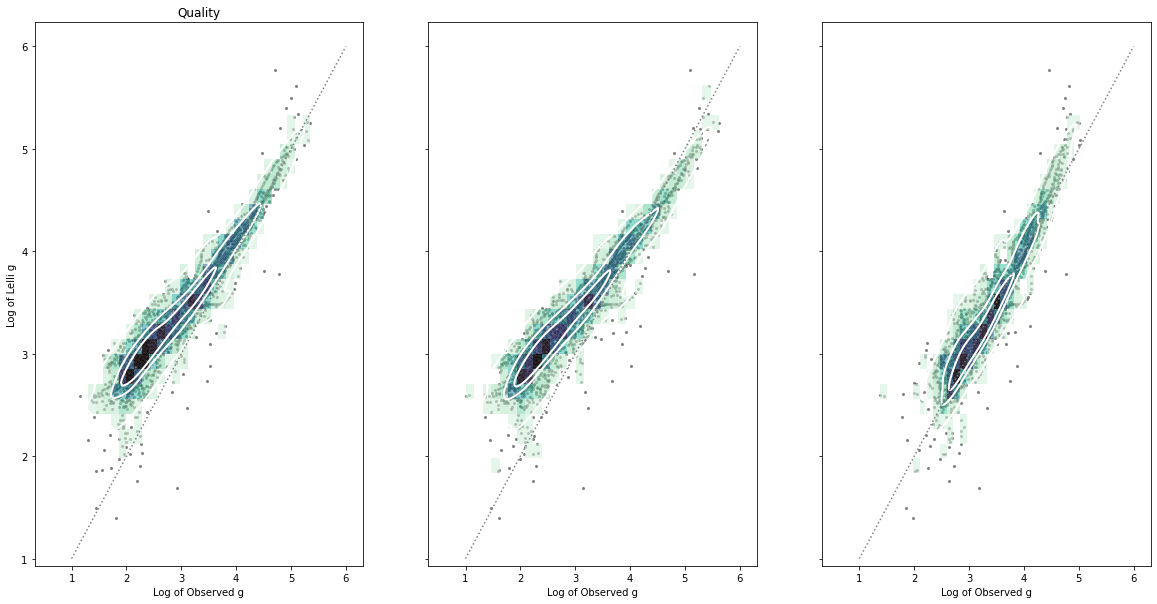

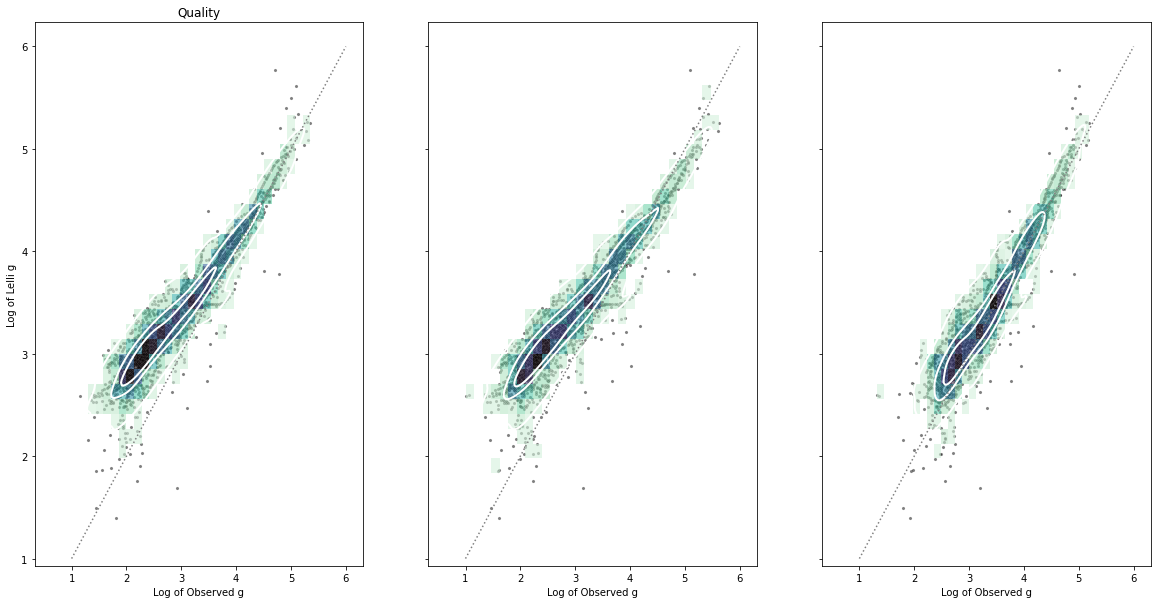

In [12]:
for mode, res in results.items():
    print(mode)
    res.plot_rar(kind=1, query_key=DATASET)

yes
no


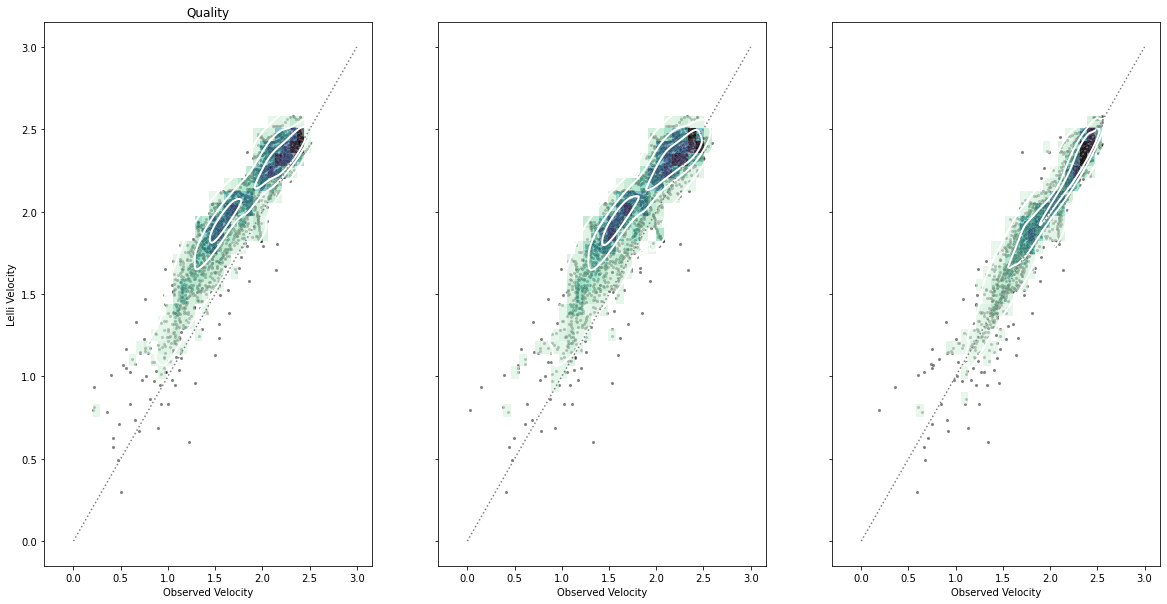

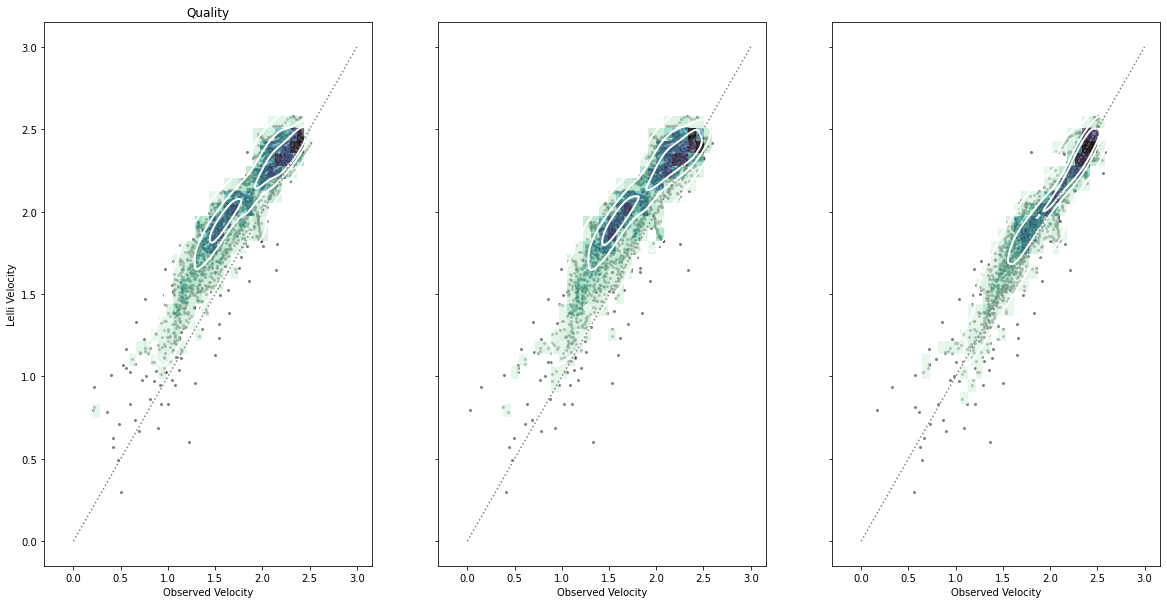

In [13]:
for mode, res in results.items():
    print(mode)
    res.plot_rar(kind=1, query_key=DATASET, velocity=True, line=[0,3])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


yes


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, alpha, gamma]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 32 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


no


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, gamma]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 14 seconds.
The number of effective samples is smaller than 25% for some parameters.


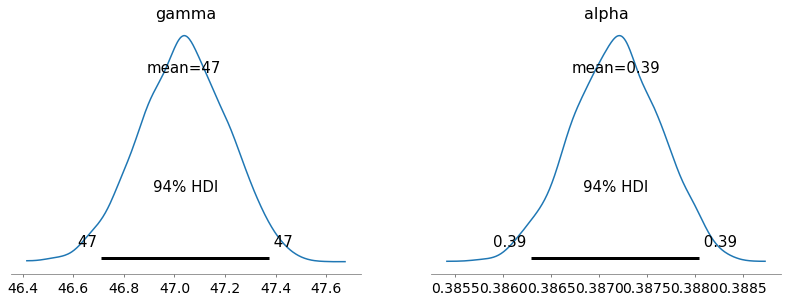

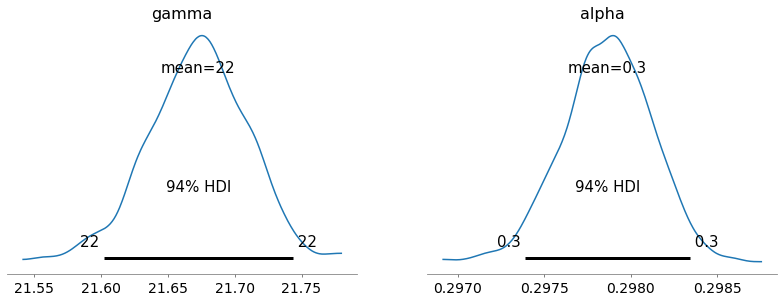

In [10]:
for mode, aa in analysis.items():
    print(mode)
    aa.plot_posterior()

In [2]:
from references.sparc import adjustment_df
adjs = adjustment_df()

In [61]:
adjs = adjs[adjs['Galaxy'].isin(mcmc_adjs['Galaxy'])]
adjs = pd.concat([adjs,mcmc_adjs], ignore_index=True)

In [11]:
def plot_comparison(dfs, what_sources, compare, to_source='SPARC', sort=None, x_sort='Galaxy'):
    fig, axes = plt.subplots(3, 1, figsize=(20,10))
    
    # sort correctly
    to_df = dfs[dfs['Source']==to_source].sort_values(compare)
    indx = to_df.set_index(x_sort)
    indx['sort'] = np.arange(len(indx))
    
    for i, what_source in enumerate(what_sources):
        what_df = dfs[dfs['Source']==what_source]
        
        # 1. Absolutes
        ax = axes[0]
        
        # continue sort for both what's
        what_df = what_df.join(indx[['sort']], on=x_sort).sort_values('sort')
        
        # only plot reference once
        if i == 0:
            tx, ty, te = to_df[x_sort], to_df[compare], to_df["e_%s" % compare]
            ax.fill_between(tx, ty-2*te, ty+2*te, color='whitesmoke')
            ax.fill_between(tx, ty-te, ty+te, color='lightgrey')
            sns.lineplot(x=tx, y=ty, label=to_source, color='grey', ax=ax)
            sns.scatterplot(x=tx, y=ty, color='grey', ax=ax)
        
        color = ['teal', 'orange'][i]
        wx, wy, we = what_df[x_sort], what_df[compare], what_df["e_%s" % compare]    
        g = sns.scatterplot(data=what_df, x=wx, y=compare, label=what_source, ax=ax, color=color)
        g.errorbar(wx, wy, yerr=we, ecolor=color, fmt='.k', color=color)
        
        ax.set(xticklabels=[])
        
        # 2. Ratios
        ax = axes[1]
        yy = np.array(wy)/np.array(ty)
        if i == 0:
            ax.fill_between(tx, (ty-2*te)/ty, (ty+2*te)/ty, color='whitesmoke')
            ax.fill_between(tx, (ty-te)/ty, (ty+te)/ty, color='lightgrey')
        sns.scatterplot(x=tx, y=yy, ax=ax, color=color)
        ax.set(xticklabels=[])
        
        # 3. Histogram
        ax = axes[2]
        sns.histplot(yy, ax=ax, color=color)

